In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

We first organize this such that A and B are competing advertisements with each click being at the same iteration.

In [65]:
A = np.random.binomial(1, 0.8, size = 10000)
B = np.random.binomial(1, 0.6, size = 10000)

There are equal numbers which means we can treat each observation as a moment in time.

In [79]:
def CalculateEpsilon(n, N):
    if N != 0:
        return np.sqrt(2*np.log(N*np.ones_like(n)) / n) 
    else:
        Array = np.asarray([0., 0.])
        Array[np.fabs(Array) == np.inf] = 0.
        return Array


def Iterate(A, B):
    N = 1
    n = np.asarray([1, 1], dtype=np.int32)
    mu = np.asarray([A[0], B[0]])
    Rewards = []
    Js = []
    for i in range(1, A.size):
        Epsilon = CalculateEpsilon(n, N)
        j = np.argmax(mu+Epsilon)
        n[j] += 1
        N += 1
        
        if j == 0:
            Weight = np.asarray([1., 0.])
        else:
            Weight = np.asarray([0., 1.])
        
        Reward = Weight * np.asarray([A[i], B[i]])
        mu = (mu*i + Reward)/(i+1)
        #print(j)
        Rewards.append(np.sum(Reward))
        Js.append(j)
        
    return Rewards, Js

In [80]:
Rewards, Js = Iterate(A, B)

np.cumsum(Rewards)[-1]

7992.0

Text(0,0.5,'Cumulative Reward')

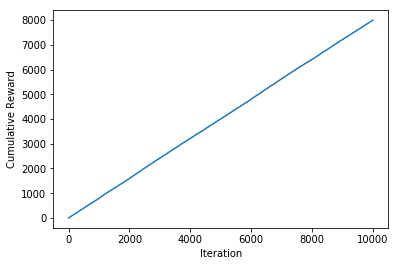

In [74]:
plt.plot(np.cumsum(Rewards))
plt.xlabel("Iteration")
plt.ylabel("Cumulative Reward")

Text(0,0.5,'Chosen Advertisement')

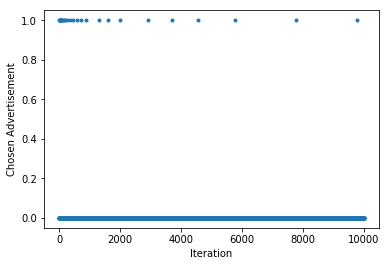

In [84]:
plt.plot(Js, linestyle = 'None', marker = '.')
plt.xlabel("Iteration")
plt.ylabel("Chosen Advertisement")

We see that exploration of B is still present but becomes more infrequent as the iterations go on.